Drug Mapping Used: {'drugY': 0, 'drugC': 1, 'drugX': 2, 'drugA': 3, 'drugB': 4}
MAE: 0.71
MSE: 0.72
RMSE: 0.85


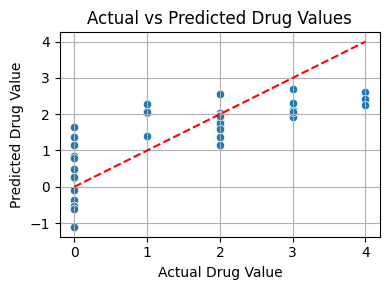

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/sem6/DWM/drug200.csv')

df['Drug'] = df['Drug'].str.strip()
drug_mapping = {drug: idx for idx, drug in enumerate(df['Drug'].unique())}
df['Drug'] = df['Drug'].map(drug_mapping)

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()
    df[col] = df[col].astype('category').cat.codes

X = df.drop(columns='Drug')
y = df['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Drug Mapping Used:", drug_mapping)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

plt.figure(figsize=(4, 3))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Drug Value')
plt.ylabel('Predicted Drug Value')
plt.title('Actual vs Predicted Drug Values')
plt.grid(True)
plt.tight_layout()
plt.show()
